In [81]:
# test structures
test_d = {'d1': [0, 0, 0],
          'd2': [0, 1, 0],
          'd3': [0, 1, 1],
          'd4': [0, 0, 1],
          'd5': [1, 1, 0],
          'd6': [1, 1, 1]}
test_d

{'d1': [0, 0, 0],
 'd2': [0, 1, 0],
 'd3': [0, 1, 1],
 'd4': [0, 0, 1],
 'd5': [1, 1, 0],
 'd6': [1, 1, 1]}

In [70]:
# # test structures
# test_d = {'d1': [0, 0, 0, 0, 0, 0],
#           'd2': [0, 0, 0, 0, 1, 1],
#           'd3': [0, 0, 1, 1, 0, 1],
#           'd4': [0, 1, 1, 1, 0, 0],
#           'd5': [0, 1, 1, 1, 1, 1],
#           'd6': [1, 0, 0, 1, 1, 0],
#           'd7': [1, 0, 1, 0, 0, 0],
#           'd8': [1, 0, 1, 0, 0, 1]}
# test_d

In [71]:
# Create a dictionary containing similarity score of a selected structure
def similarityDict(test_d):
    compare_list = []
    D = {}
    D_count = 1
    d_count = 0

    for i in range(1, len(test_d)):
        temp = []
        sim_d = {}
        
        # select two adjacent structures at the top
        up = test_d['d'+str(i)]
        down = test_d['d'+str(i+1)]

        # create the list for comparison. After each iteration additional
        # structure will be added, 'down' coordinate will be compared with
        # all the scructures in this list.
        compare_list.append(up)

        #compute similarity score
        for k in compare_list:
            up = k
            sim_score = 0
            for j in range(len(test_d['d1'])):
                if down[j] == up[j]:
                    sim_score += 1
                else:
                    break
            # dictionary containing a structure 
            # and it's similarity score
            sim_d[str(k)+str(down)] = sim_score
            d_count += 1
        
        # dictionary containing all scores produced 
        # after each iteration
        D[str(D_count)] = sim_d
        D_count += 1

    return D

In [72]:
# output similarity dictionary
import pprint 

sim_D = similarityDict(test_d)
pprint.pprint(sim_D)

{'1': {'[0, 0, 0][0, 1, 0]': 1},
 '2': {'[0, 0, 0][0, 1, 1]': 1, '[0, 1, 0][0, 1, 1]': 2},
 '3': {'[0, 0, 0][0, 0, 1]': 2,
       '[0, 1, 0][0, 0, 1]': 1,
       '[0, 1, 1][0, 0, 1]': 1},
 '4': {'[0, 0, 0][1, 1, 0]': 0,
       '[0, 0, 1][1, 1, 0]': 0,
       '[0, 1, 0][1, 1, 0]': 0,
       '[0, 1, 1][1, 1, 0]': 0},
 '5': {'[0, 0, 0][1, 1, 1]': 0,
       '[0, 0, 1][1, 1, 1]': 0,
       '[0, 1, 0][1, 1, 1]': 0,
       '[0, 1, 1][1, 1, 1]': 0,
       '[1, 1, 0][1, 1, 1]': 2}}


In [73]:
# function to return key for any value 
def get_key(sim_L):
    count = 0
    most_alike = []

    for j in sim_L:
        for key, value in j.items():
            if maxes_ind[count] == value:
                most_alike.append(key)
                count += 1
        
    return most_alike    

In [74]:
# function to convert strings to lists
def ret_list(maxes_s):
    temp = []
    ML = []

    for i in range(len(maxes_s)):
        for l in maxes_s[i]:
            if len(temp) < (len(test_d['d1'])): #only the first 3 numbers
                if l=='0' or l=='1':
                    temp.append(int(l))
        ML.append(temp)
        temp = []

    return ML

In [75]:
# Un-matryoshka the similarity dictionary, 
# and put everything into a list (easier to index)
sim_L = []
for i in range(1, len(sim_D)+1):
    sim_L.append(sim_D[str(i)])

# Find the maximum similarity values for all structures
maxes_ind = []
for i in sim_D.values():
    maxes_ind.append(max(i.values()))

# get the structure according to it's max similarity value
maxes_s = get_key(sim_L)
# convert those structures into lists (they were str before)
MAX = ret_list(maxes_s)
MAX

[[0, 0, 0], [0, 1, 0], [0, 0, 0], [0, 0, 0], [1, 1, 0]]

In [76]:
# if all the similarity values are same, choose the first structure
# def all_same(items):
#     return all(x == items[0] for x in items)

# check_vals = []
# for v in sim_D['4'].values():
#     check_vals.append(v)

# all_same(check_vals)

In [77]:
up = MAX[0] 
up

[0, 0, 0]

In [78]:
# Set values for verticies
def Verticies(test_d, MAX):
    # initialize the vertecies of first structure
    init_v = list(range(1, len(MAX[0])+1))
    ind_d = {'i1': init_v}
    same_path = True 
    count = 3

    # label verticies according to structures in MAX
    for i in range(1, len(test_d)):
        temp = []

        # set 'up' structure as the once that has the highest 
        # similarity value as 'down' ( as computed in MAX)
        up = MAX[i-1]               #start from [0,0,0]
        down = test_d['d'+str(i+1)] #start from [0,1,0]

        for j in range(len(up)):
            # if verticies are on the same path, set values 
            # same as in verticies along this path
            if down[j] == up[j] and same_path==True:
                temp.append(ind_d['i'+str(MAX.index(up)+1)][j])
            # if path diverges, verticies get a new value
            else: 
                count += 1
                temp.append(count)
                # since path diverged, all following 
                # verticies will have new values
                same_path=False

        # Add verticies values into a dictionary
        ind_d['i'+str(i+1)] = temp
        # Path is reset
        same_path=True

    return ind_d

vertecies_val = Verticies(test_d, MAX)
vertecies_val

{'i1': [1, 2, 3],
 'i2': [1, 4, 5],
 'i3': [1, 4, 6],
 'i4': [1, 2, 7],
 'i5': [8, 9, 10],
 'i6': [8, 9, 11]}

In [79]:
# Compute edges from vertecies and path infromation
def Edges(vertecies_val):
    root = [0]
    EDGES = []
    idx = 0

    for i in vertecies_val.values():
        for j in range(len(i)):
            if j == 0 and (root[idx],i[idx]) not in EDGES :
                EDGES.append((root[idx],i[idx]))
            elif j == 1 and (i[idx], i[idx+1]) not in EDGES:
                EDGES.append((i[idx], i[idx+1]))
            elif j == 2 and (i[idx+1], i[idx+2]) not in EDGES:
                EDGES.append((i[idx+1], i[idx+2]))
                
    return EDGES

EDGES = Edges(vertecies_val)

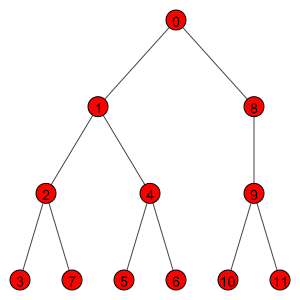

In [80]:
from igraph import *

# plot the tree graph
tree = Graph(edges=EDGES)
tree.vs['label'] = [v.index for v in tree.vs]
plot(tree,layout=tree.layout('rt',root=[0]),bbox=(300,300))